In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/project1_df.csv')
df

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,295864,5407639888,Other,25-45,23/02/2020 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.907300,2709.017300,Debit Card,Other
54996,706435,1144029904,Other,18-25,12/07/2021 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.303900,3402.713900,Cash on Delivery,Bangalore
54997,649435,9587323189,Male,45-60,02/08/2024 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.687500,3677.057500,Credit Card,Mumbai
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.473500,3772.913500,Credit Card,Kolkata


In [3]:
df.head() #Shows the first five rows of the dataset

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [4]:
df.shape

(55000, 13)

In [5]:
df.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


We see a lot of categorical data that can help us to find relation between categorical data and numerical data

In [7]:
df.isnull().sum()

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,27585
Discount Amount (INR),0
Gross Amount,0


In [8]:
df.dropna(subset=['Discount Name'], inplace=True)

In [9]:
df.isnull().sum()

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,0
Discount Amount (INR),0
Gross Amount,0


The purchase column doesnt seem to contain any data so we are dropping that column.

In [10]:
# Drop the 'Purchase Date' column
df = df.drop(columns=['Purchase Date'])

In [11]:
df.shape

(27415, 12)

In [12]:
df.head()

,CID,TID,Gender,Age Group,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
4,447553,8009390577,Male,18-25,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi
5,200614,3994452858,Male,18-25,Clothing,Yes,FESTIVE50,127.01,3649.397400,3522.387400,Credit Card,Delhi


In [13]:
# Ensuring that 'Gross Amount', 'Net Amount', and 'Discount Amount' are numeric
df['Gross Amount'] = pd.to_numeric(df['Gross Amount'], errors='coerce')
df['Net Amount'] = pd.to_numeric(df['Net Amount'], errors='coerce')
df['Discount Amount (INR)'] = pd.to_numeric(df['Discount Amount (INR)'], errors='coerce')

print(df.columns)

Index(['CID', 'TID', 'Gender', 'Age Group', 'Product Category',
       'Discount Availed', 'Discount Name', 'Discount Amount (INR)',
       'Gross Amount', 'Net Amount', 'Purchase Method', 'Location'],
      dtype='object')


In [14]:
# Now we can perform the validation as intended
df['Validation'] = df['Net Amount'] == (df['Gross Amount'] - df['Discount Amount (INR)'])

# Find discrepancies where the validation fails
discrepancies = df[df['Validation'] == False]
print(discrepancies)

          CID         TID  Gender     Age Group   Product Category  \
2      337580  3814082218   Other  60 and above           Clothing   
4      447553  8009390577    Male         18-25   Sports & Fitness   
5      200614  3994452858    Male         18-25           Clothing   
21     110195  8013666930  Female         25-45        Electronics   
22     443120  4473452038  Female      under 18   Sports & Fitness   
...       ...         ...     ...           ...                ...   
54922  436551  4665534867  Female         45-60  Beauty and Health   
54932  282640  1186999169  Female         25-45           Clothing   
54933  327408  2820849865   Other         18-25   Sports & Fitness   
54941  827497  3410764347    Male         45-60   Sports & Fitness   
54996  706435  1144029904   Other         18-25        Electronics   

      Discount Availed    Discount Name  Discount Amount (INR)  Gross Amount  \
2                  Yes  SEASONALOFFER21                 211.54   1986.372575   

# **UNIVARIATE ANALYSIS**

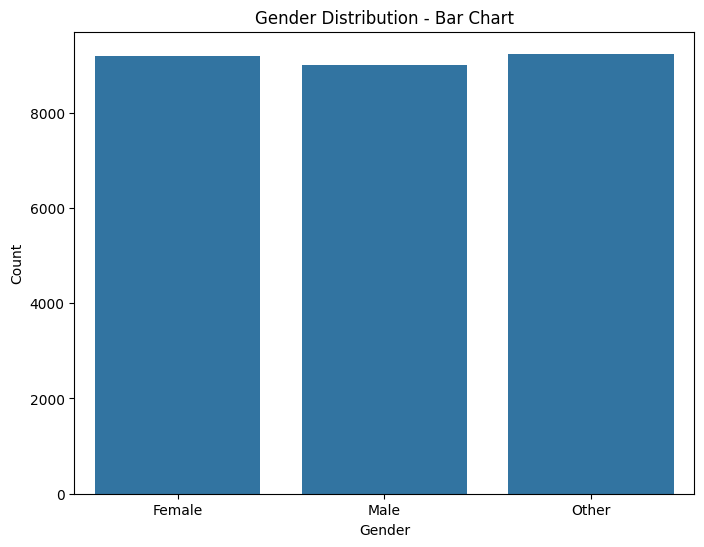

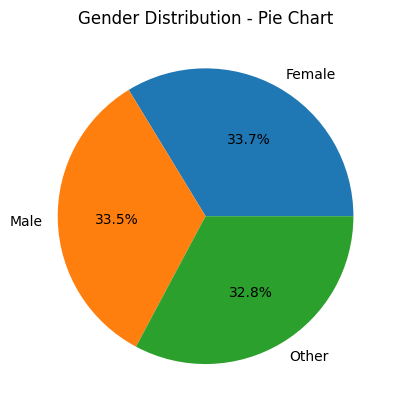

In [15]:
#Ploting a bar graph on gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution - Bar Chart')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Drawing a pie chart on the same data
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution - Pie Chart')
plt.show()

**The graph and pie chart shows the number of buyers from each gender.
It shows how female buyers are more than male buyers but overall people who are in none of the categories are more than both female and male**

<ipython-input-16-3119b7b6ca1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', order=df['Age Group'].value_counts().index, palette=custom_palette)
<ipython-input-16-3119b7b6ca1c>:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Age Group', order=df['Age Group'].value_counts().index, palette=custom_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

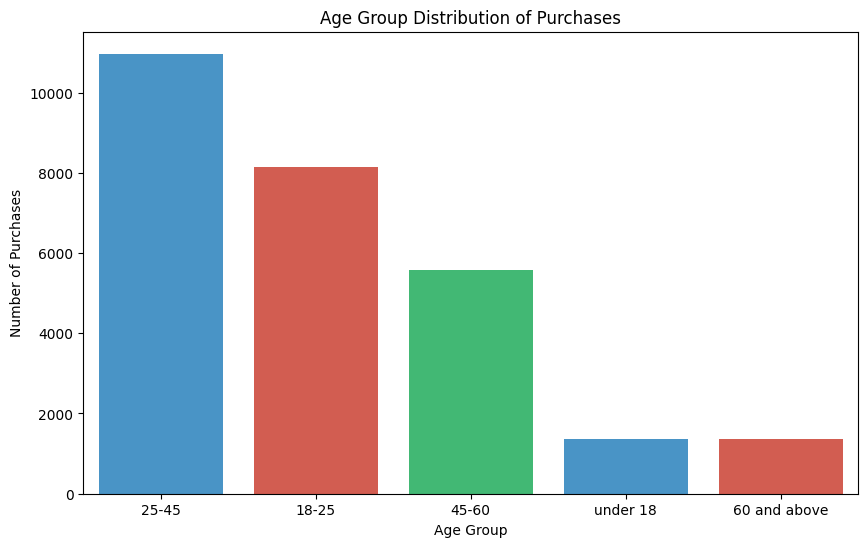

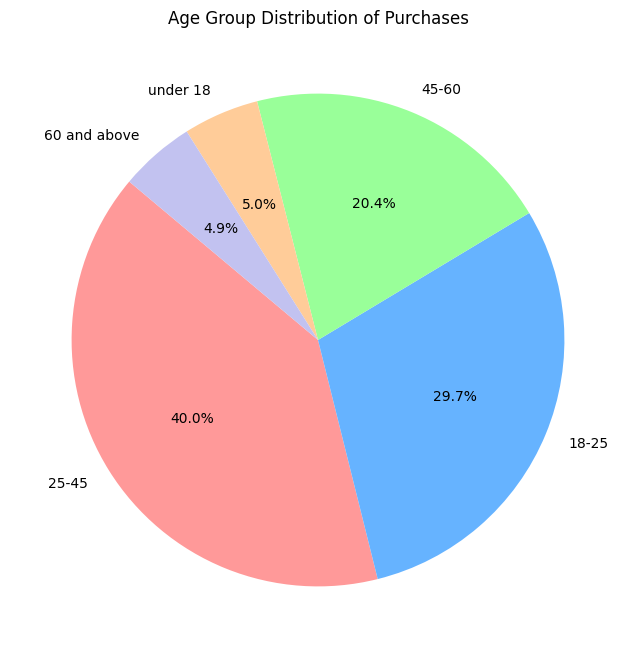

In [16]:
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette(['#3498db', '#e74c3c', '#2ecc71'])
sns.countplot(data=df, x='Age Group', order=df['Age Group'].value_counts().index, palette=custom_palette)
plt.title('Age Group Distribution of Purchases')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
#plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()

# Calculate the counts for each Age Group
age_group_counts = df['Age Group'].value_counts()
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ffcc00']

# Create a pie chart for Age Group Distribution
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors[:len(age_group_counts)])
plt.title('Age Group Distribution of Purchases')
plt.show()

**The** **above** **graphs** and pie chart shows the percentage by ehich each age group prefers ecommerce and buying online. The above data shows that people in the age group of 25-45 that is the adut generation prefers ebuying probably because of thier busy lives and inavailibility of time for going to stores. Similarly the time spend on online buying decreases as age increases being the least for 60 and above.

However ebuying is gaining popularity in the younger generation of age group 18-25

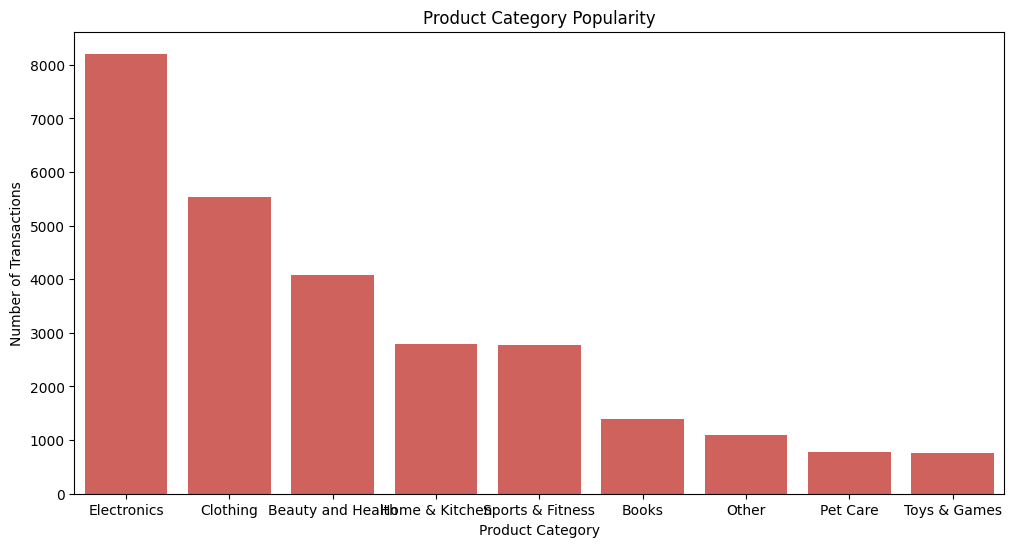

In [37]:
plt.figure(figsize=(12, 6))
sns.set_palette(sns.color_palette("Spectral"))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Product Category Popularity')
plt.ylabel('Number of Transactions')
plt.xlabel('Product Category')
plt.show()

The above graph shows the amount of items brought in each category. The graph shows that the most popular things bought are in electronics category followed by clothings and others.

However elctronics sales are very high as compared to other categories which shows that people prefer to buy electronics more than other things.

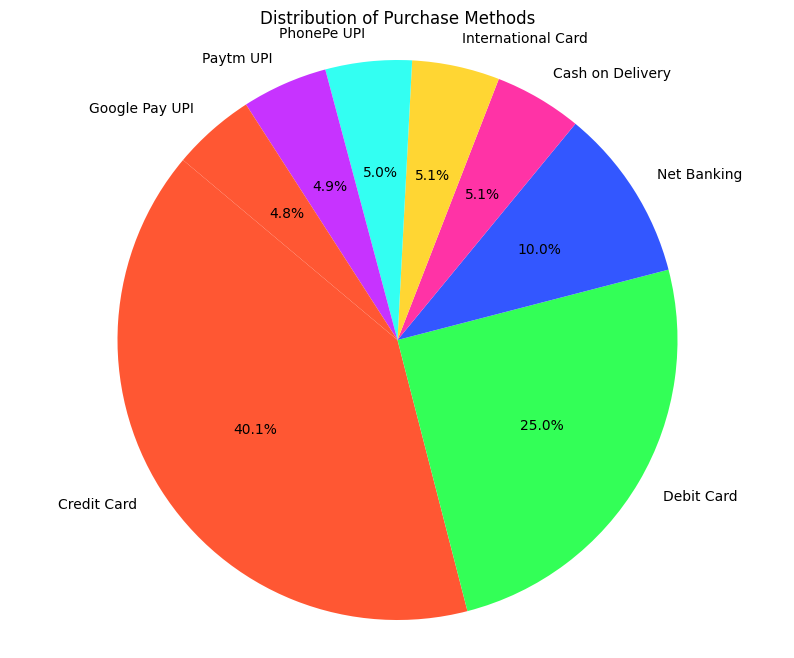

In [18]:
purchase_method_counts = df['Purchase Method'].value_counts()

# Define a custom color palette (modify this list based on your preference)
custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#FFD633', '#33FFF2', '#C733FF']

# Pie Chart for Purchase Method Distribution
plt.figure(figsize=(10, 8))
plt.pie(purchase_method_counts, labels=purchase_method_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors[:len(purchase_method_counts)])
plt.title('Distribution of Purchase Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

The pie chart shows what method people prefer to pay for the things that they buy.

The data show that most people prefer credit card and debit card to pay online. However net banking is also gaining popularity in terms of methods of payment.

<ipython-input-36-4ec7a4f626f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product Category', y='Gross Amount', estimator='mean', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWa

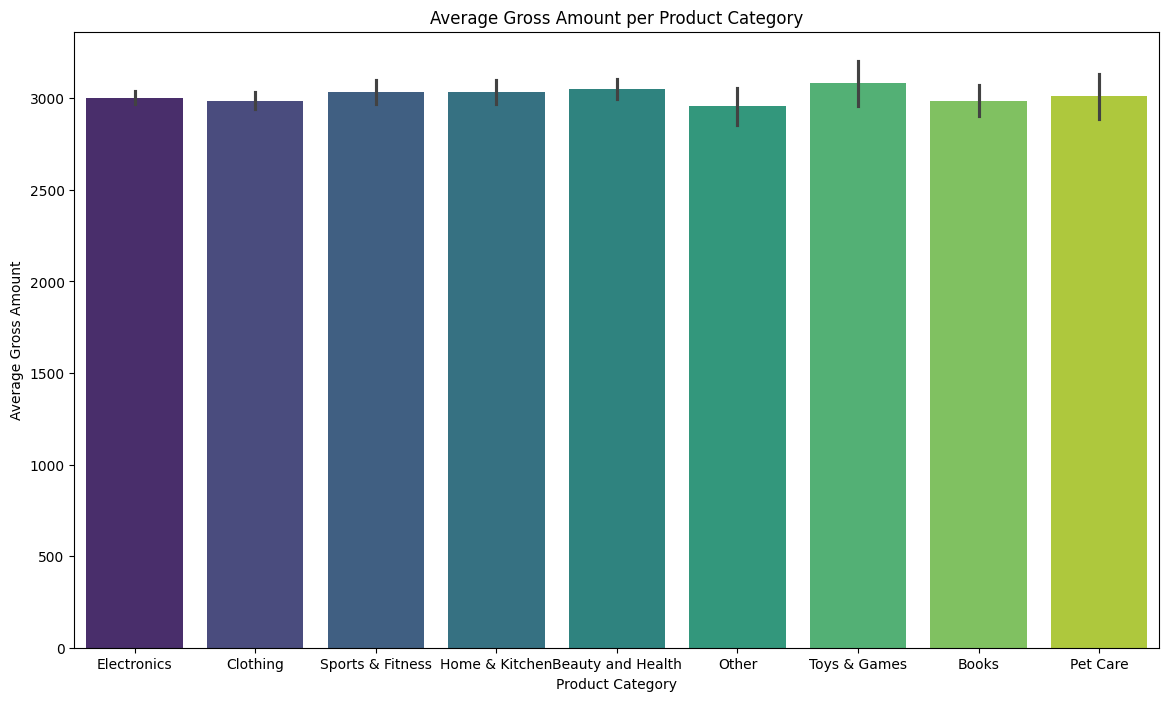

In [36]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Product Category', y='Gross Amount', estimator='mean', palette='viridis')
plt.title('Average Gross Amount per Product Category')
plt.ylabel('Average Gross Amount')
plt.xlabel('Product Category')
plt.show()

<ipython-input-20-891cbccb7ff9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Discount Name', palette='plasma', order=df['Discount Name'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

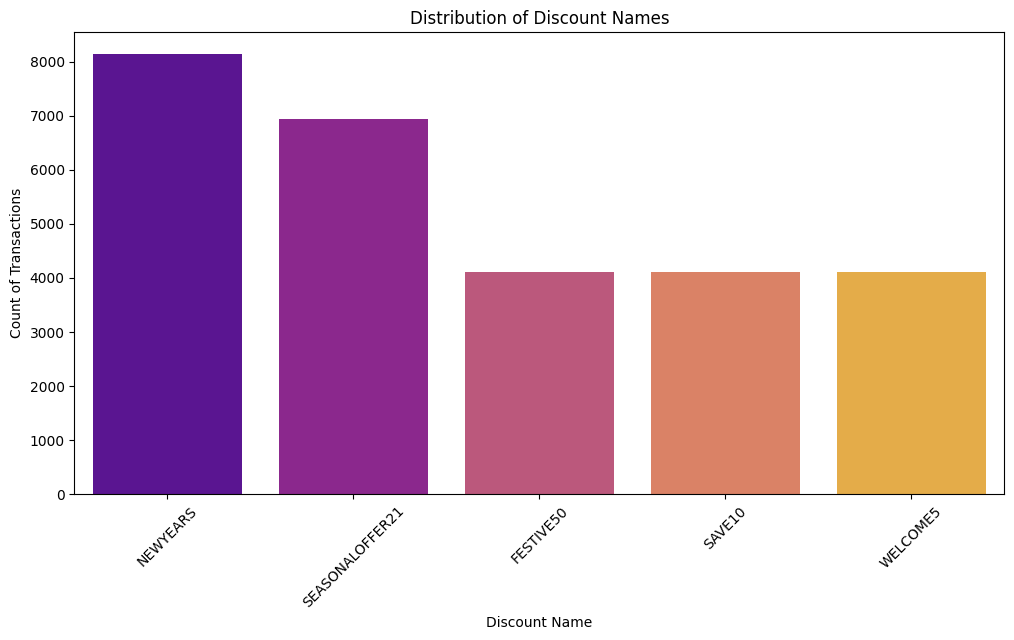

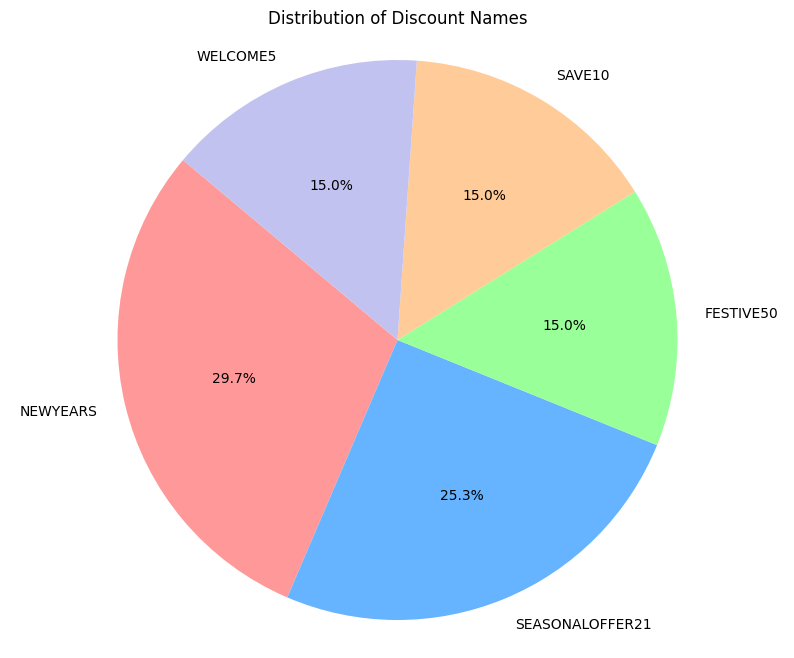

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Discount Name', palette='plasma', order=df['Discount Name'].value_counts().index)
plt.title('Distribution of Discount Names')
plt.xlabel('Discount Name')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#PIE CHART
discount_counts = df['Discount Name'].value_counts()
# Pie Chart for Discount Name Distribution
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ffcc00']

plt.figure(figsize=(10, 8))
plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors[:len(discount_counts)])
plt.title('Distribution of Discount Names')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

The above graph and pie chart shows the amount of transactions made during offer periods. It shows that most things are bought during the ner years as they might give more sales and more offers

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

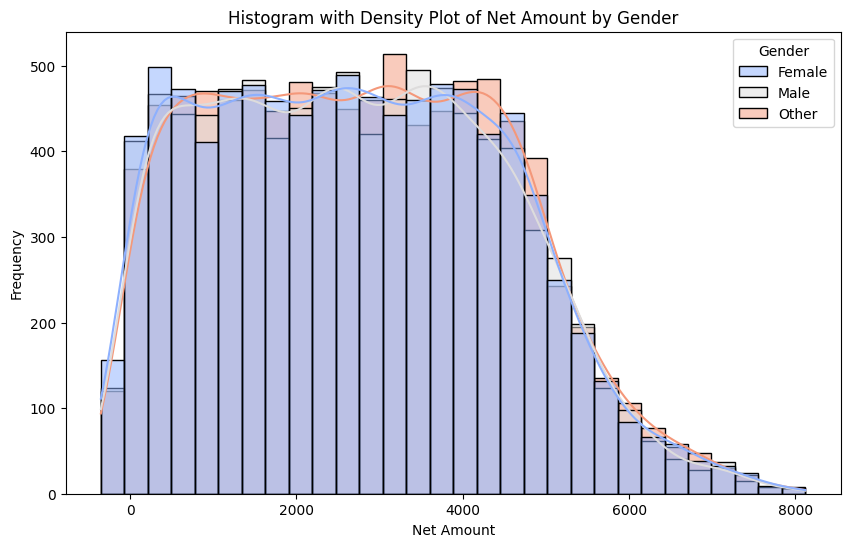

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Net Amount', hue='Gender', kde=True, bins=30, palette='coolwarm')
plt.title('Histogram with Density Plot of Net Amount by Gender')
plt.xlabel('Net Amount')
plt.ylabel('Frequency')
plt.show()

Unlike histograms, which can be affected by the number and width of bins, KDE plots provide a continuous and smooth curve that better represents the underlying data distribution.
KDE plots helps in identifying the shape of the distribution, including peaks, skewness, and multimodal patterns (multiple peaks). It clearly shows the number of peaks which helps to identify the distribution.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

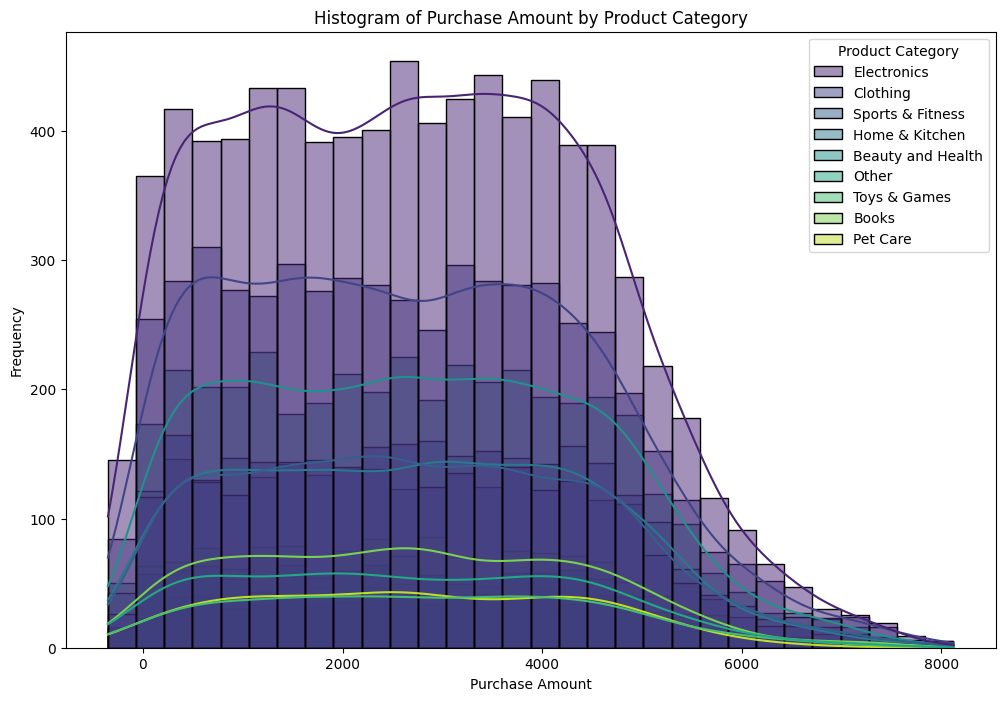

In [22]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Net Amount', hue='Product Category', kde=True, bins=30, palette='viridis')
plt.title('Histogram of Purchase Amount by Product Category')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

This plot shows how electronics are more famous and its KDE plot is much higher than other plots.

On the other hand plots of books, toys and other lower categories have same plots with same heights and distribution and are much lower than others

#**BIVARIATE ANALYSIS**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


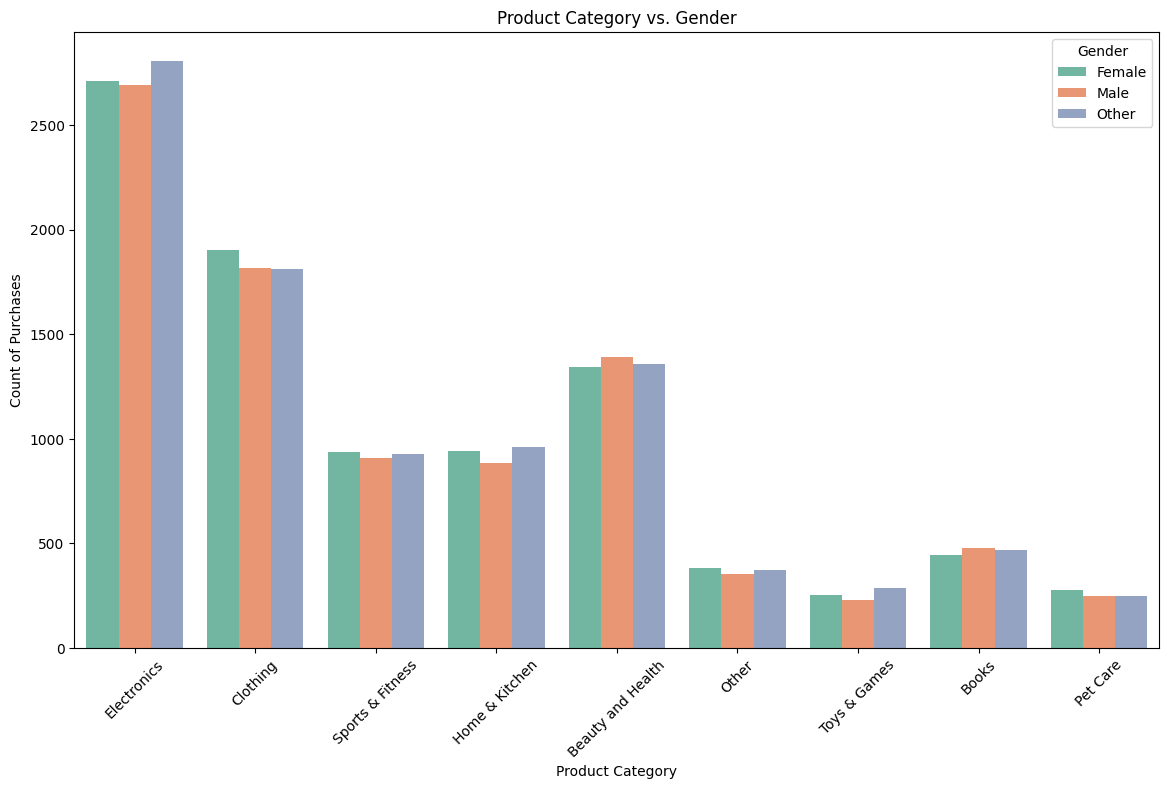

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Product Category', hue='Gender', palette='Set2')
plt.title('Product Category vs. Gender')
plt.xlabel('Product Category')
plt.ylabel('Count of Purchases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

If certain product categories show a higher count of purchases for one gender over the other, it suggests a preference."Electronics" has a much higher bar for males, it indicates that men tend to purchase electronics more frequently than women.

"Sports Equipment" is predominantly purchased by females, promotions for this category could be targeted more towards female customers.

Beauty and health, books, and pet care categories have more closely matched counts across genders suggesting broad appeal, meaning marketing for these categories could be more generalized.

<ipython-input-24-e6e9fed580cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Purchase Method', y='Net Amount', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

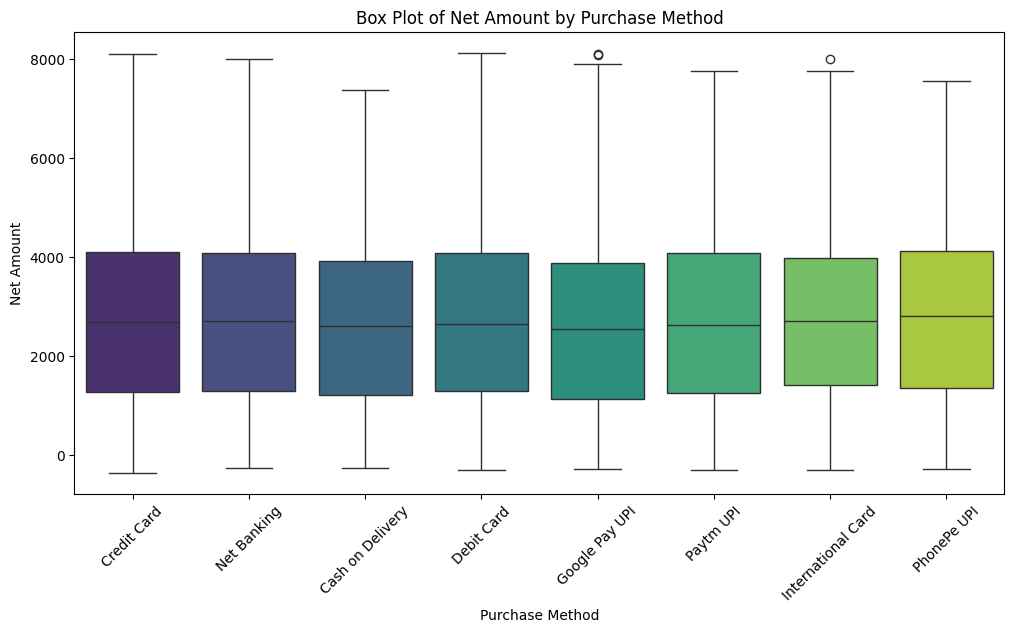

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Purchase Method', y='Net Amount', palette='viridis')
plt.title('Box Plot of Net Amount by Purchase Method')
plt.xlabel('Purchase Method')
plt.ylabel('Net Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

Methods with higher median values (indicated by the line within the box) represent those where customers tend to spend more.Thus all payment methods have the same pattern for each method.

The length of each box indicates the interquartile range (IQR) for Net Amount. A larger IQR means more variability in the amounts spent for that purchase method.Such in the case of debit card and credit card

"Online" shows several high outliers, it indicates that although most purchases are within a certain range, some customers are making very high-value transactions online. Similar case for international cards



<ipython-input-25-3110e91d796f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age Group', y='Net Amount', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

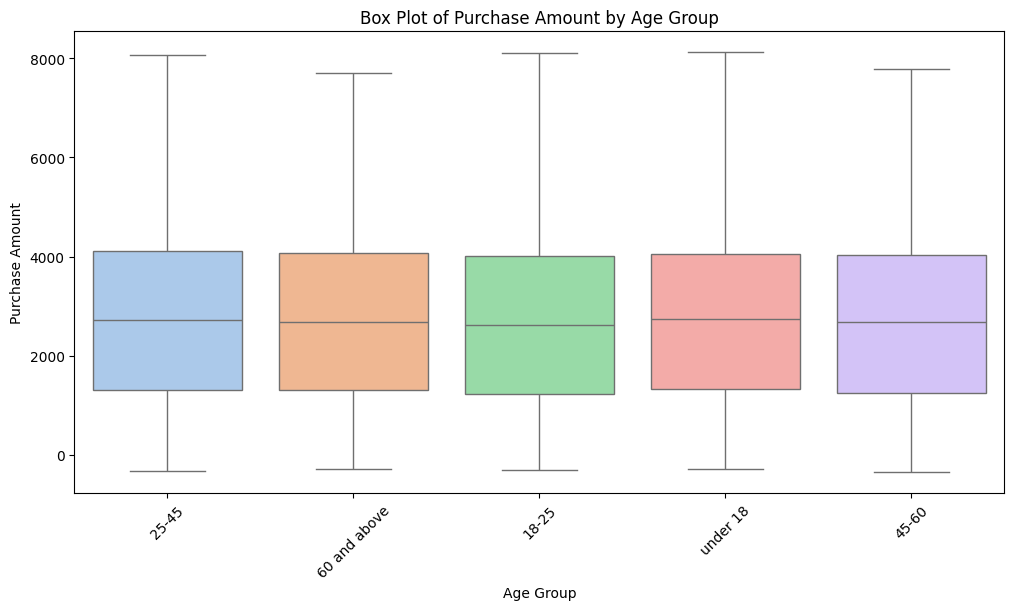

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age Group', y='Net Amount', palette='pastel')
plt.title('Box Plot of Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

Higher median values for certain age groups suggest that these groups tend to spend more on average.The "under 18" age group has the highest median, it indicates this group typically spends more than other age groups.

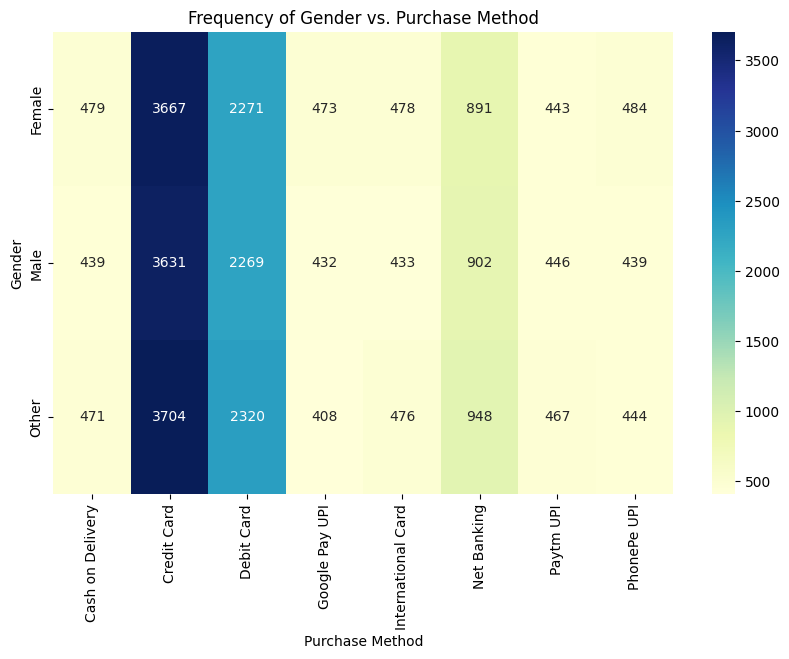

In [26]:
# Create a frequency table
gender_purchase_method = pd.crosstab(df['Gender'], df['Purchase Method'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gender_purchase_method, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Gender vs. Purchase Method')
plt.xlabel('Purchase Method')
plt.ylabel('Gender')
plt.show()

**Analysis**

This heatmap will display how often each gender uses each purchase method.
Darker areas indicate more frequent combinations, helping identify popular methods for each gender.

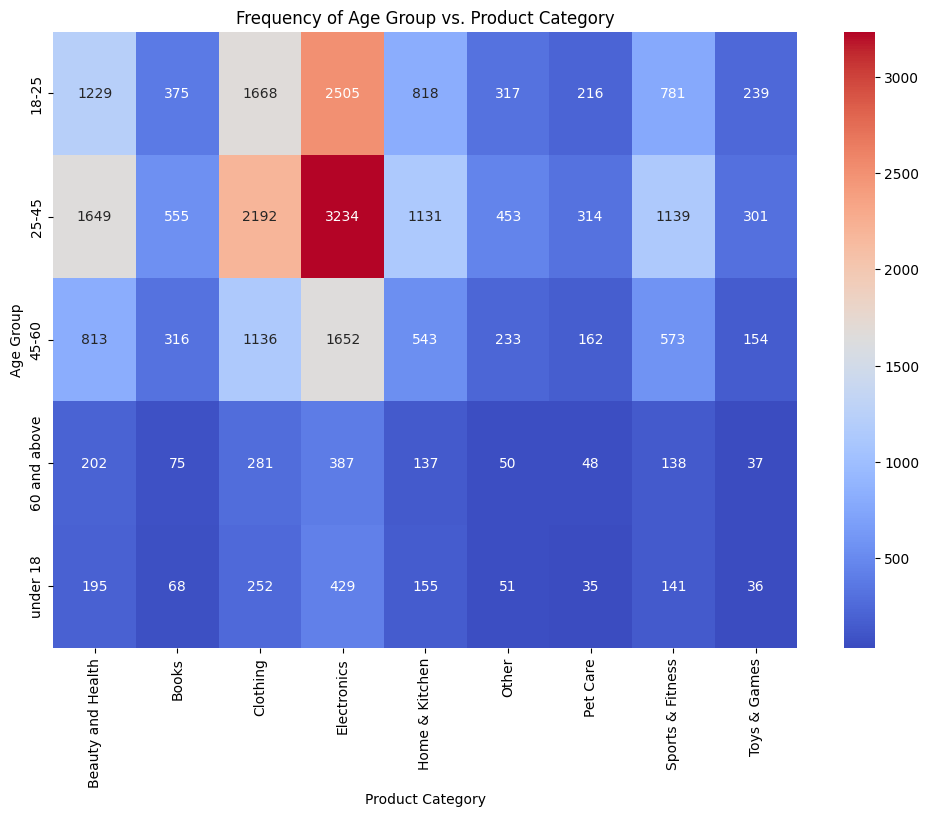

In [27]:
# Create a frequency table
age_product_category = pd.crosstab(df['Age Group'], df['Product Category'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_product_category, annot=True, cmap='coolwarm', fmt='d')
plt.title('Frequency of Age Group vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

This heatmap will show which discounts are commonly associated with each purchase method.

It helps in understanding how promotions are being utilized across different methods.

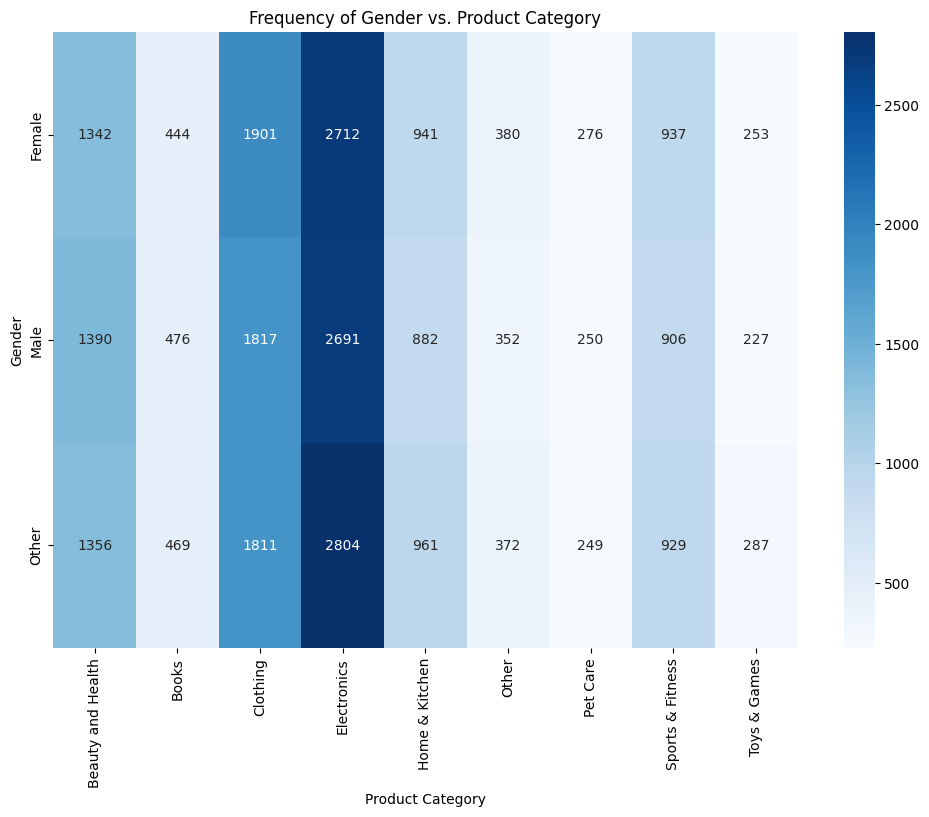

In [28]:
# Create a frequency table
gender_product_category = pd.crosstab(df['Gender'], df['Product Category'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_category, annot=True, cmap='Blues', fmt='d')
plt.title('Frequency of Gender vs. Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()

This shows product preferences across genders, which could inform targeted marketing strategies.

You can quickly identify if there is a strong preference for certain categories among a specific gender.

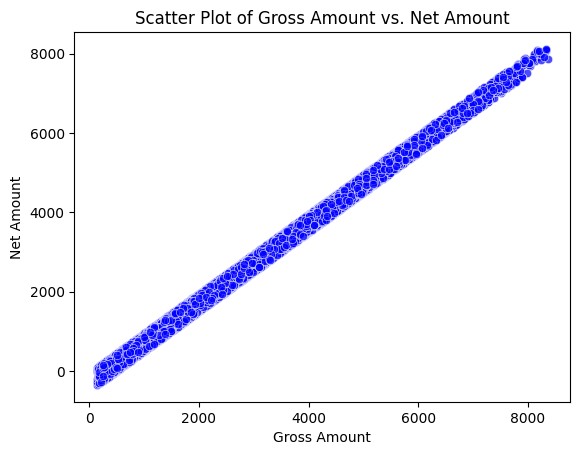

In [38]:
# Create scatter plot for Gross Amount vs Net Amount
sns.scatterplot(data=df, x='Gross Amount', y='Net Amount', alpha=0.7, color='blue')

# Add title and labels
plt.title('Scatter Plot of Gross Amount vs. Net Amount')
plt.xlabel('Gross Amount')
plt.ylabel('Net Amount')

# Show the plot
plt.show()

The points are closely aligned along a diagonal line from bottom-left to top-right, this indicates a positive linear relationship. This would mean that as the Gross Amount increases, the Net Amount also increases, confirming a strong positive correlation.

In [29]:
# Filter data by gender
net_amount_male = df[df['Gender'] == 'Male']['Net Amount']
net_amount_female = df[df['Gender'] == 'Female']['Net Amount']

# Perform T-Test
t_stat, p_val = ttest_ind(net_amount_male, net_amount_female, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: -0.05478897973513348
P-Value: 0.9563071823638567


the p value shows that as its value is more than 0.05,we fail to reject the null hypothesis, meaning there isn’t enough evidence to suggest a significant difference in spending between males and females.

The result is not statistically significant, meaning there is no sufficient evidence to conclude that male and female customers spend differently on average. Therefore, the spending difference between genders might be due to random chance rather than a real underlying difference.

In [33]:
# Assuming 'Category A' and 'Category B' are the two categories to compare
purchase_amount_A = df[df['Product Category'] == 'Category A']['Net Amount']
purchase_amount_B = df[df['Product Category'] == 'Category B']['Net Amount']

# Check if either Series is empty before performing the Z-Test
if purchase_amount_A.empty or purchase_amount_B.empty:
    print("One or both categories have no data. Cannot perform Z-Test.")
else:
    # Perform Z-Test
    z_stat, p_val = ztest(purchase_amount_A, purchase_amount_B)

    print("Z-Statistic:", z_stat)
    print("P-Value:", p_val)

One or both categories have no data. Cannot perform Z-Test.


In [32]:
correlation = df['Gross Amount'].corr(df['Net Amount'])
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.9971469296369871


Positive values (closer to 1) imply that as Gross Amount increases, Net Amount also tends to increase.
This indicates a strong positive relationship between Gross Amount and Net Amount